In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
parent_path = str(os.path.dirname(os.getcwd()))

In [3]:
reds = pd.read_csv(parent_path + "/data/winequality-red.csv", delimiter = ";")
whites = pd.read_csv(parent_path + "/data/winequality-white.csv", delimiter = ";")

In [4]:
reds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


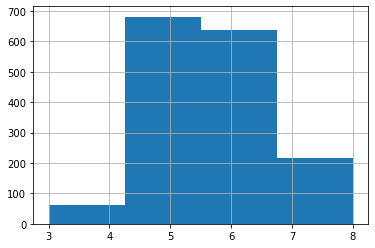

In [5]:
reds['quality'].hist(bins = 4)

In [6]:
whites.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


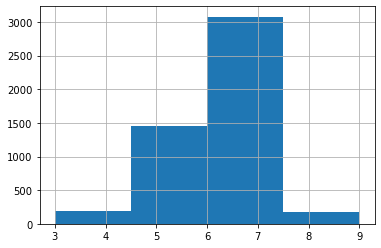

In [7]:
whites['quality'].hist(bins = 4)

### Feature Engineering

Create binary for red or white wine, and combine the two data frames into one.

In [8]:
#1 for red, 0 for white
reds['is_red'] = 1
whites['is_red'] = 0

In [9]:
wines = pd.concat([reds, whites], axis = 0) 
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Create binary for "good" or "not good" wine based on 0-7 < quality < 7.1-10.

In [10]:
wines['is_good'] = np.where(wines['quality'] < 7, 0, 1)

**Given that 5, 6, and 7 quality wines are the most frequent in the dataset, we may want to adjust this binary for good and bad.**

In [11]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  is_red                6497 non-null   int64  
 13  is_good               6497 non-null   int64  
dtypes: float64(11), int64(3)
memory usage: 761.4 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0eb923610>,
      dtype=object)

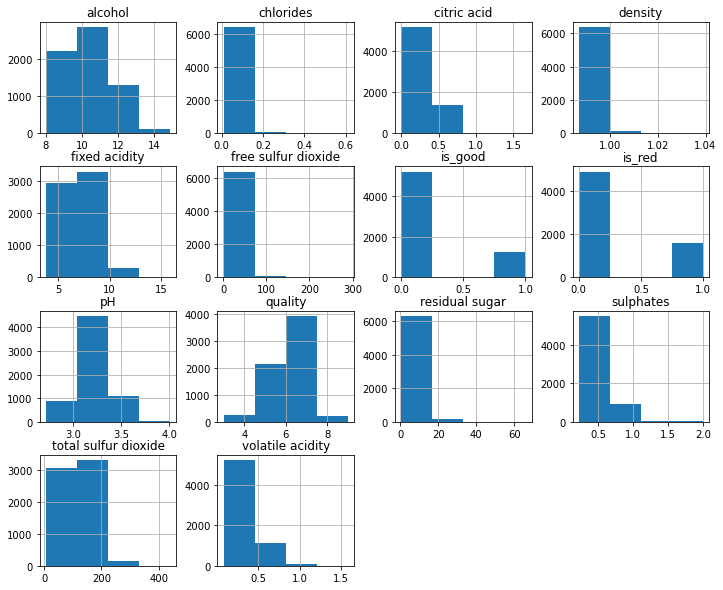

In [12]:
wines.hist(figsize = (12,10), bins = 4)

**Some insights we can derive from these historgram distributions:**
- There are about 3 times more white wines than red wines
- Residual sugar, chlorides, and density are heavily skewed right
- There are many middle of the road quality wines (i.e. 5, 6, 7 ratings) vs poor or high quality ones




ValueError: supplied range of [-inf, 0.5068176023684519] is not finite

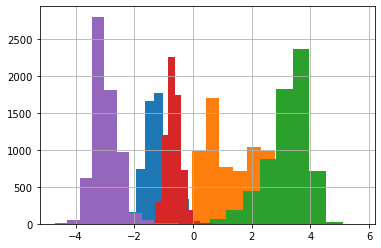

In [14]:
# take log of skewed features
wines['volatile acidity'].apply(np.log).hist()
wines['residual sugar'].apply(np.log).hist()
wines['free sulfur dioxide'].apply(np.log).hist()
wines['sulphates'].apply(np.log).hist()
wines['chlorides'].apply(np.log).hist()
wines['citric acid'].apply(np.log).hist()
plt.show()

### Unsupervized Clustering

Hierarchical clustering

In [15]:
#split x, y
wines = wines.drop(['quality'], axis = 1)
y = wines['is_good']
x = wines.drop(['is_good'], axis=1)

#standardize x
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = StandardScaler().fit_transform(x.values)
x = pd.DataFrame(scaled_features, index=x.index, columns=x.columns)

#train, test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [16]:
red_x = reds.drop(['quality', 'is_red'], axis=1)
scaled_features = StandardScaler().fit_transform(red_x.values)
red_x = pd.DataFrame(scaled_features, index=red_x.index, columns=red_x.columns)

white_x = whites.drop(['quality', 'is_red'], axis=1)
scaled_features = StandardScaler().fit_transform(white_x.values)
white_x = pd.DataFrame(scaled_features, index=white_x.index, columns=white_x.columns)

In [17]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(x)

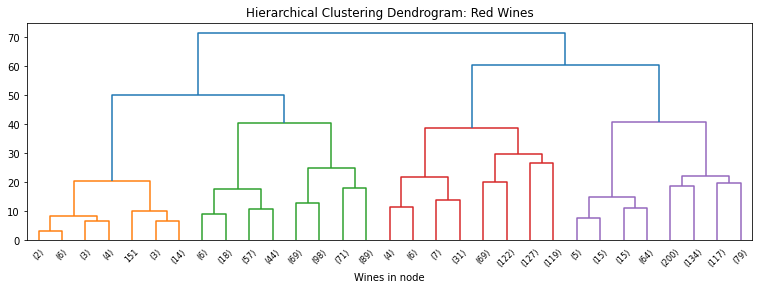

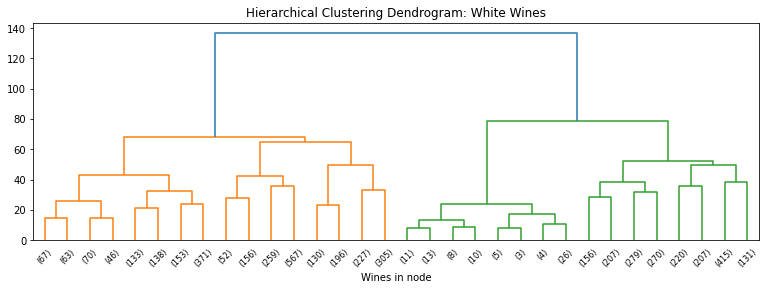

In [18]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)


model = model.fit(red_x)
plt.figure(figsize=(13,4))
plt.title('Hierarchical Clustering Dendrogram: Red Wines')
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Wines in node")
plt.show()

model = model.fit(white_x)
plt.figure(figsize=(13,4))
plt.title('Hierarchical Clustering Dendrogram: White Wines')
plot_dendrogram(model, truncate_mode='level', p=4)
plt.xlabel("Wines in node")
plt.show()

K-means clustering

In [19]:
from sklearn.cluster import KMeans

kmeans_reds = KMeans(n_clusters=2, random_state=0).fit(red_x)
labels_reds = KMeans(n_clusters=2, random_state=0).fit_predict(red_x)

kmeans_whites = KMeans(n_clusters=3, random_state=0).fit(white_x)
labels_whites = KMeans(n_clusters=3, random_state=0).fit_predict(white_x)

In [20]:
Updated red_x['alcohol'] to red_x['density']

SyntaxError: invalid syntax (<ipython-input-20-c787f4eb1c88>, line 1)

Text(0.5, 1.0, 'Red Wine KMeans')

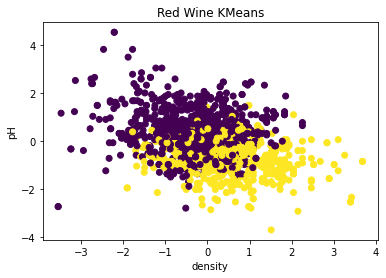

In [21]:
plt.scatter(red_x['density'], red_x['pH'], c = labels_reds)
plt.xlabel("density")
plt.ylabel("pH")
plt.title("Red Wine KMeans")

Text(0.5, 1.0, 'White Wine KMeans')

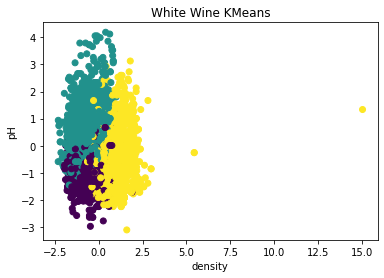

In [22]:
plt.scatter(white_x['density'], white_x['pH'], c = labels_whites)
plt.xlabel("density")
plt.ylabel("pH")
plt.title("White Wine KMeans")

### Baseline Supervised Models

In [23]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [24]:
#random forest
rf = RandomForestClassifier().fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_predict_prob = rf.predict_proba(x_test)

#logistic regression
lr = LogisticRegression(max_iter = 1000).fit(x_train, y_train)
lr_predict = lr.predict(x_test)
lr_predict_prob = lr.predict_proba(x_test)

#naive bayes
nb = GaussianNB().fit(x_train, y_train)
nb_predict = nb.predict(x_test)
nb_predict_prob = nb.predict_proba(x_test)

#knn
knn = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)
knn_predict = knn.predict(x_test)
knn_predict_prob = knn.predict_proba(x_test)

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, rf_predict), accuracy_score(y_test, lr_predict), 
      accuracy_score(y_test, nb_predict), accuracy_score(y_test, knn_predict))

0.8848484848484849 0.827972027972028 0.7561771561771562 0.8377622377622378


In [26]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

print(roc_auc_score(y_test, rf_predict), roc_auc_score(y_test, lr_predict),
      roc_auc_score(y_test, nb_predict), roc_auc_score(y_test, knn_predict))

0.7546601532297743 0.6198495817811205 0.705855064314332 0.7190342306881282


In [27]:
def plot_ROC(truth,preds,label_string):

    fpr, tpr, thresholds = roc_curve(truth,preds)
    roc_auc = auc(fpr,tpr)
    
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curves for Select Models')
    plt.legend(loc="lower right")

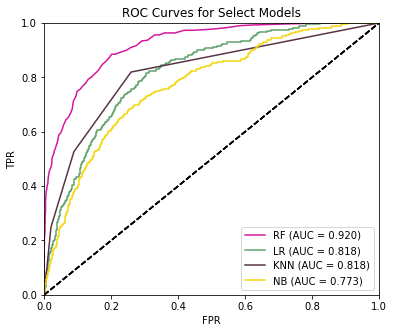

In [28]:
dict_vals = {"RF": rf_predict_prob[:,1], "LR": lr_predict_prob[:,1],
            "KNN": knn_predict_prob[:,1], "NB": nb_predict_prob[:,1]}

fig = plt.figure(figsize = (6, 5))
ax = plt.subplot(111)

for i in dict_vals:
    plot_ROC(y_test, dict_vals[i], i) 